In [15]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [16]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine)

In [20]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [33]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [39]:
# Find the most recent date in the data set.
mrdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
mrdate

('2017-08-23',)

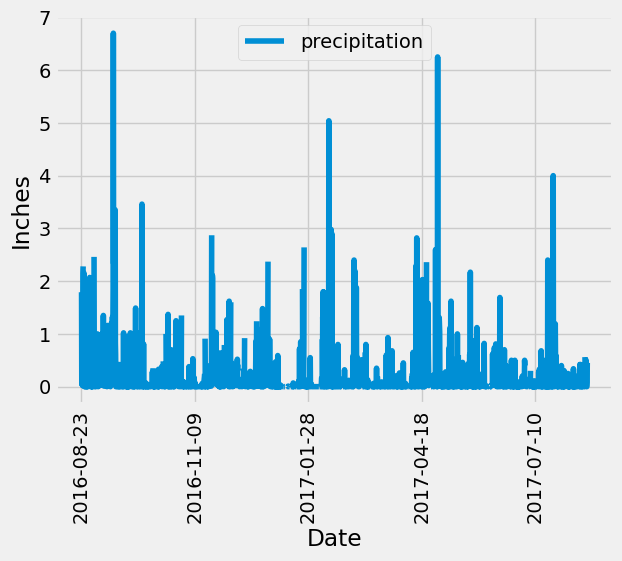

In [44]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
mrdatedate = dt.datetime.strptime(recent_date[0],'%Y-%m-%d')
mrdatedate = mrdatedate.date()

# Calculate the date one year from the last date in data set.
oneyear = recent_date_as_date - dt.timedelta(days=365)
oneyears = one_year.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date <=recent_date[0]).\
                filter(Measurement.date >=one_year_string).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipdf = pd.DataFrame(results, columns=['date','precipitation']).set_index('date')

# Sort the dataframe by date
precipdf = precipdf.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
precipdf.plot(kind='line',rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')


plt.show()

In [48]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipsumstat = precipdf.describe()
print(precipsumstat)

       precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [47]:
# Design a query to calculate the total number of stations in the dataset
total = session.query(Measurement.station).distinct().count()
print(total)

9


In [51]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
scounts = session.query(Measurement.station, func.count(Measurement.station)).\
                                                group_by(Measurement.station).\
                                                order_by(func.count(Measurement.station).desc())
scountsdf = pd.DataFrame(scounts, columns=['station id','# of measurements'])
print(scountsdf)

    station id  # of measurements
0  USC00519281               2772
1  USC00519397               2724
2  USC00513117               2709
3  USC00519523               2669
4  USC00516128               2612
5  USC00514830               2202
6  USC00511918               1979
7  USC00517948               1372
8  USC00518838                511


In [53]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostactive = session.query(Measurement.station, func.min(Measurement.tobs),
                                      func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                                        filter(Measurement.station == scounts[0][0])
pd.DataFrame(mostactive, columns=['Station ID','min temp','max temp','avg temp'])

,Station ID,min temp,max temp,avg temp
0,USC00519281,54.0,85.0,71.663781


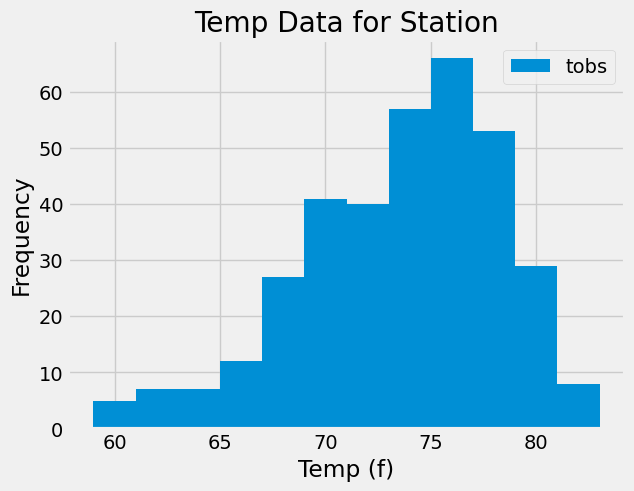

In [58]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = session.query(Measurement.station, Measurement.date, Measurement.tobs)\
                    .filter(Measurement.date <= recent_date[0])\
                    .filter(Measurement.date >= one_year_string)\
                    .filter(Measurement.station == scounts[0][0])\
                    .all()
tempdf = pd.DataFrame(temp, columns=['Station ID','Date','tobs'])

tempdf.plot(kind='hist', bins=12)
plt.xlabel('Temp (f)')
plt.title('Temp Data for Station')

plt.show()

# Close Session

In [56]:
# Close Session
session.close()